In [7]:
import warnings
warnings.filterwarnings(action="ignore", module="scipy", message="^internal gelsd")

from sklearn import linear_model
from sklearn import preprocessing
from sklearn import metrics
from sklearn.model_selection import train_test_split
import pandas as pd

import matplotlib.pyplot as plt

## Read data from csv

In [8]:
data = pd.read_csv('./data/passenger_info.csv')

data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


## Create some baseline

In [11]:
ages = data[data.Age.notnull()].Age
ages.mean()

29.69911764705882

In [12]:
features = []

# Sex
array, levels = pd.factorize(data.Sex)
data['factorized_sex'] = array
features.append('factorized_sex')

# Age
data['known_age'] = data.Age.notnull().astype(int)
features.append('known_age')
for age in [10, 20, 30, 40, 50, 60, 70]:
    name = 'more_{}_years'.format(age)
    data[name] = (data['Age'] >= age).astype(int)
    features.append(name)

levels

Index(['male', 'female'], dtype='object')

In [13]:
X = data[features]
y = data.Survived
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [14]:
reg = linear_model.LinearRegression()
reg.fit(X_train, y_train)

sorted_features = list(sorted(zip(features, reg.coef_), key=lambda x: -abs(x[1])))
sorted_features

[('factorized_sex', 0.5502789977837783),
 ('known_age', 0.2093346228418844),
 ('more_10_years', -0.1450545051890952),
 ('more_60_years', -0.09503559880384975),
 ('more_70_years', 0.08756974944594441),
 ('more_30_years', 0.06335049071641767),
 ('more_40_years', -0.05404286488022054),
 ('more_50_years', 0.012385558391905296),
 ('more_20_years', -0.0023821639994232213)]

In [15]:
y_predicted = reg.predict(X_test)

In [16]:
fpr, tpr, _ = metrics.roc_curve(y_test, y_predicted)
roc_auc = metrics.auc(fpr, tpr)

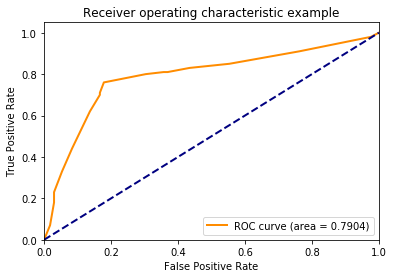

In [17]:
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.4f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [18]:
# Fare
min_max_scaler = preprocessing.MinMaxScaler()
data['scaled_fare'] = min_max_scaler.fit_transform(data[['Fare']])
features.append('scaled_fare')    
    
# Class
for cl_num in [1, 3]:
    name = 'class{}'.format(cl_num)
    data[name] = (data['Pclass'] == cl_num).astype(int)
    features.append(name)

for sp in [1,2,3,4,5]:
    name = 'sib_sp_{}'.format(sp)
    data[name] = (data.SibSp == sp).astype(int)
    features.append(name)
    
for emb in ['C', 'Q', 'S']:
    name = 'embarked{}'.format(emb)
    data[name] = (data.Embarked == emb).astype(int)
    features.append(name)
    

In [19]:
X = data[features]
y = data.Survived
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [20]:
reg = linear_model.LinearRegression()
reg.fit(X_train, y_train)

sorted_features = list(sorted(zip(features, reg.coef_), key=lambda x: -abs(x[1])))
sorted_features

[('sib_sp_4', -0.6094350492631067),
 ('factorized_sex', 0.4897021703624261),
 ('sib_sp_3', -0.44746407743397243),
 ('known_age', 0.44067846360381696),
 ('more_10_years', -0.3879381213695838),
 ('sib_sp_5', -0.36110806590807537),
 ('embarkedS', -0.21615587334465106),
 ('class3', -0.15833660008320938),
 ('class1', 0.14896855700336806),
 ('embarkedC', -0.14080616102548948),
 ('more_60_years', -0.13098754315111358),
 ('scaled_fare', 0.11314638777258867),
 ('sib_sp_2', -0.09535474620752135),
 ('embarkedQ', -0.08750071880558272),
 ('more_40_years', -0.07638274488641952),
 ('more_70_years', 0.07037725332428009),
 ('more_50_years', -0.05181982988051265),
 ('sib_sp_1', 0.02771502503090463),
 ('more_20_years', 0.005643842599454038),
 ('more_30_years', 0.0009953268513427094)]

In [21]:
y_predicted = reg.predict(X_test)

In [22]:
fpr_full, tpr_full, _ = metrics.roc_curve(y_test, y_predicted)
roc_auc_full = metrics.auc(fpr_full, tpr_full)

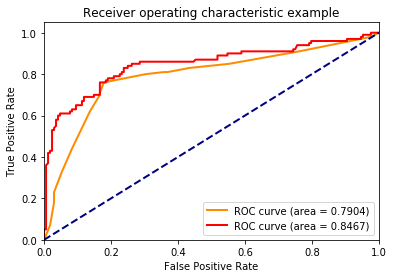

In [23]:
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.4f)' % roc_auc)
plt.plot(fpr_full, tpr_full, color='red',
         lw=lw, label='ROC curve (area = %0.4f)' % roc_auc_full)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [24]:
features_part = list(map(lambda x: x[0], sorted_features[:9]))
features_part

['sib_sp_4',
 'factorized_sex',
 'sib_sp_3',
 'known_age',
 'more_10_years',
 'sib_sp_5',
 'embarkedS',
 'class3',
 'class1']

In [25]:
X = data[features_part]
y = data.Survived
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [26]:
reg = linear_model.LinearRegression()
reg.fit(X_train, y_train)

reg.coef_

array([-0.59219715,  0.50413907, -0.4377684 ,  0.42059545, -0.39268102,
       -0.34329523, -0.09384483, -0.15200828,  0.13527439])

In [27]:
y_predicted = reg.predict(X_test)

In [28]:
fpr_part, tpr_part, thresholds = metrics.roc_curve(y_test, y_predicted)
roc_auc_part = metrics.auc(fpr_part, tpr_part)

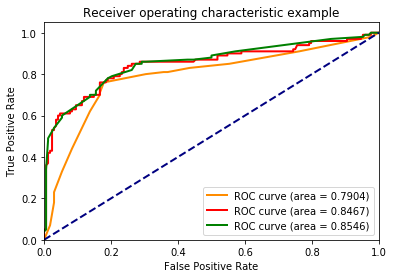

In [29]:
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.4f)' % roc_auc)
plt.plot(fpr_full, tpr_full, color='red',
         lw=lw, label='ROC curve (area = %0.4f)' % roc_auc_full)
plt.plot(fpr_part, tpr_part, color='green',
         lw=lw, label='ROC curve (area = %0.4f)' % roc_auc_part)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [30]:
from sklearn.externals import joblib

In [31]:
joblib.dump(reg, 'model.pkl')

['model.pkl']

In [32]:
fpr_part, tpr_part, thresholds

(array([0.        , 0.00595238, 0.00595238, 0.00595238, 0.00595238,
        0.00595238, 0.00595238, 0.01190476, 0.01190476, 0.0297619 ,
        0.05357143, 0.05357143, 0.13690476, 0.13690476, 0.14285714,
        0.1547619 , 0.1547619 , 0.19047619, 0.20238095, 0.26190476,
        0.27380952, 0.29166667, 0.29166667, 0.30357143, 0.42857143,
        0.44642857, 0.5       , 0.5       , 0.57142857, 0.85714286,
        0.95238095, 0.95833333, 0.9702381 , 0.97619048, 0.98809524,
        1.        ]),
 array([0.04, 0.05, 0.07, 0.21, 0.23, 0.33, 0.34, 0.48, 0.49, 0.54, 0.59,
        0.6 , 0.69, 0.7 , 0.7 , 0.7 , 0.72, 0.78, 0.79, 0.82, 0.85, 0.85,
        0.86, 0.86, 0.87, 0.87, 0.88, 0.89, 0.91, 0.97, 0.98, 0.99, 0.99,
        1.  , 1.  , 1.  ]),
 array([ 1.13033624,  1.0721728 ,  0.97832797,  0.96677445,  0.93886002,
         0.87292961,  0.83150005,  0.73765522,  0.70974079,  0.67949178,
         0.65157735,  0.62619718,  0.58564694,  0.56803373,  0.55773252,
         0.54055957,  0.4741889 ,

In [33]:
[thresholds[i] for i in range(len(fpr_part)) if fpr_part[i] > 1 - tpr_part[i]]

[0.3687905466217284,
 0.3408761207316009,
 0.3273609861108162,
 0.2998868229427074,
 0.24235171771825076,
 0.23351615224243644,
 0.20560172635230894,
 0.17535270970551836,
 0.14787854653740956,
 0.14743828381539087,
 0.08150787583713859,
 0.053593449947011096,
 -0.0065502092595716155,
 -0.06897785032025083,
 -0.11800825201582804,
 -0.3562605211048405,
 -0.5106892769018218]